In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns




train = pd.read_csv('datasets/bank-churn/train.csv')
test = pd.read_csv('datasets/bank-churn/test.csv')




In [2]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

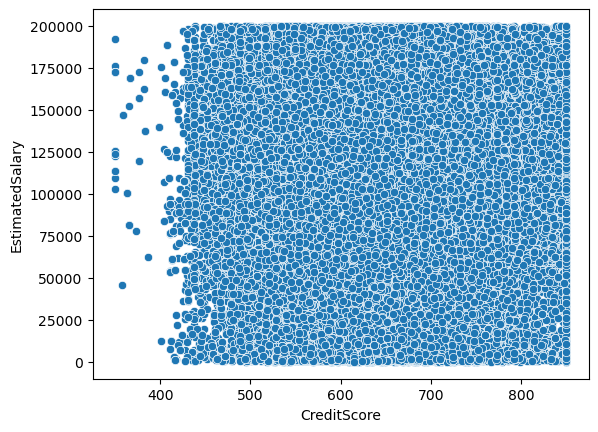

In [36]:
sns.scatterplot(x=train.CreditScore, y=train.EstimatedSalary)

In [41]:
def add_field(df):

    train.loc[:,train.nunique() < 5].astype('category')
    df = df.assign(Balance_Age_Avg=train.groupby(pd.qcut(train.Age, q=4))['Balance'].transform("mean").astype('Float32'),
              balance_salary_ratio=lambda x: x.Balance / x.EstimatedSalary
              )
    
    df = df.drop(["Surname"], axis=1, errors='ignore')
    return df

In [46]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [52]:
train.groupby(['Surname', 'Geography']).size()

Surname  Geography
Abazu    France        1
Abbie    France        4
Abbott   France       21
         Germany       1
         Spain         2
                      ..
Zuyev    Germany      16
         Spain        11
Zuyeva   France       26
         Germany      14
         Spain        20
Length: 6444, dtype: int64

/Users/alexander.norton/Documents/Machine-Learning/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexander.norton/Documents/Machine-Learning/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


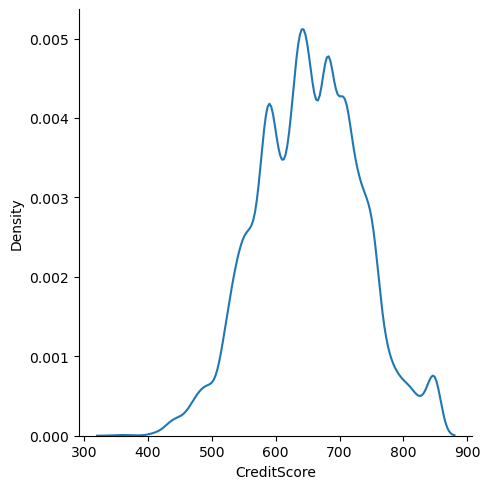

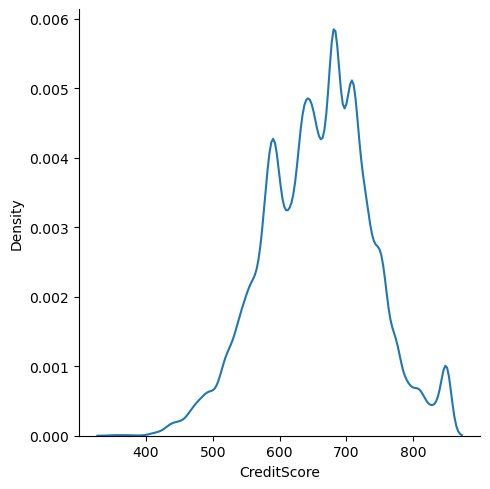

In [94]:
mask = train.Exited == 1
sns.dist(train[mask].CreditScore,kind="kde")

sns.displot(train[~mask].CreditScore,kind="kde")




plt.show()

In [42]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer
import sklearn
sklearn.set_config(transform_output="pandas")


from sklearn.linear_model import LinearRegression, LogisticRegression


columns1 = make_column_transformer(
    (FunctionTransformer(add_field), make_column_selector(dtype_include=np.generic)),
    verbose_feature_names_out=False, remainder='passthrough'
)

train1 = train.drop("Exited", axis=1)
ohe_columns = train1.loc[:, train.nunique() < 5].columns.tolist()

columns2 = make_column_transformer(
    (OneHotEncoder(drop="if_binary", sparse_output=False), ohe_columns ),
    verbose_feature_names_out=False, remainder="passthrough"
)



def create_pipeline(*estimater):
    if estimater == None:
        return make_pipeline(columns1, columns2)
    else:
        return make_pipeline(columns1, columns2, *estimater, memory="~/cache")
    

from sklearn.decomposition import PCA


p = create_pipeline(PCA(), LogisticRegression())

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
def print_roc_curve(*clfs, X,y):
    ax = plt.gca()
    for clf in clfs:
        clf.fit(X,y)
        ax = plt.gca()
        displ = RocCurveDisplay.from_estimator(clf, X,y, ax=ax, name=str(clf[-1]))
        
    ax.legend(bbox_to_anchor=(1, 1))
        
    plt.show()
    
    
    
create_pipeline().fit_transform(train)

,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,id,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,15674932,668,33.0,3,0.00,181449.97,0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1,15749177,627,33.0,1,0.00,49503.50,0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2,15694510,678,40.0,10,0.00,184866.69,0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3,15741417,581,34.0,2,148882.54,84560.88,0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,4,15766172,716,33.0,5,0.00,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,165029,15667085,667,33.0,2,0.00,131834.75,0
165030,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,165030,15665521,792,35.0,3,0.00,131834.45,0
165031,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,165031,15664752,565,31.0,5,0.00,127429.56,0
165032,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,165032,15689614,554,30.0,7,161533.00,71173.03,0


/var/folders/cv/lyp80g3175v43k438cr6bx700000gq/T/ipykernel_31999/40529680.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.assign(Balance_Age_Avg=train.groupby(pd.qcut(train.Age, q=4))['Balance'].transform("mean").astype('Float32'))
/Users/alexander.norton/Documents/Machine-Learning/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folder

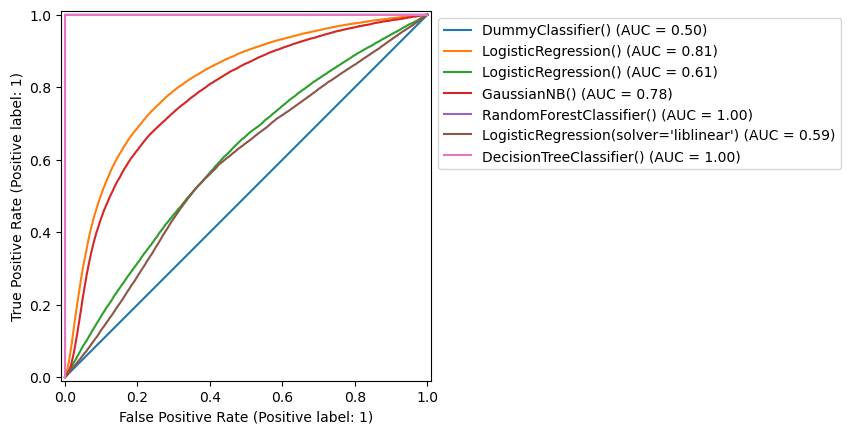

In [7]:

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

pipe = create_pipeline(LogisticRegression())

pipe6 = create_pipeline(LogisticRegression(solver="liblinear"))

pipe2 = create_pipeline(GaussianNB())

pipe3 = create_pipeline(RandomForestClassifier())

pipe4 = create_pipeline(DecisionTreeClassifier())

dummy = create_pipeline(DummyClassifier())

y =  train.Exited
X = train.drop("Exited", axis=1)

print_roc_curve(dummy,p, pipe, pipe2, pipe3, pipe6, pipe4,X=X,y=y)

In [44]:
 X

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


/var/folders/cv/lyp80g3175v43k438cr6bx700000gq/T/ipykernel_31999/3368160507.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.assign(Balance_Age_Avg=train.groupby(pd.qcut(train.Age, q=4))['Balance'].transform("mean").astype('Float32'),
/var/folders/cv/lyp80g3175v43k438cr6bx700000gq/T/ipykernel_31999/3368160507.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.assign(Balance_Age_Avg=train.groupby(pd.qcut(train.Age, q=4))['Balance'].transform("mean").astype('Float32'),


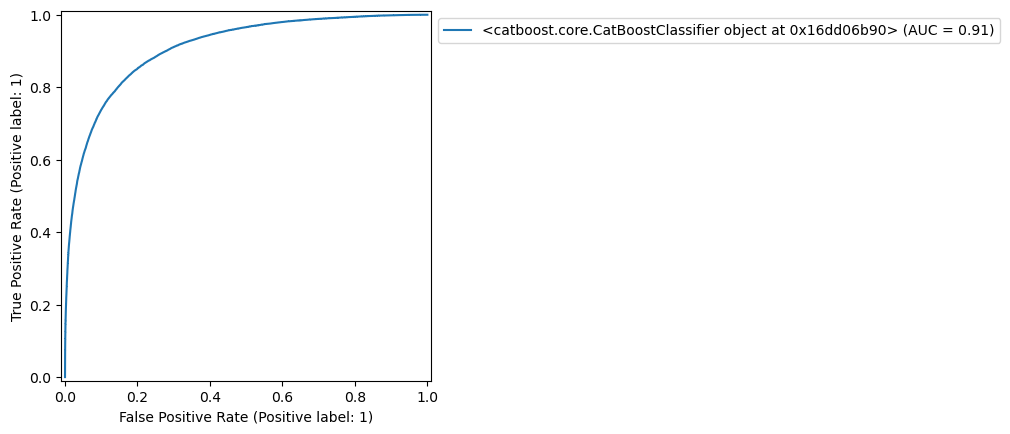

In [45]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier


cat = create_pipeline(CatBoostClassifier(verbose=False))


print_roc_curve(cat,X=X, y=y) 

In [10]:
ans = cat.predict_proba(test)

sub = pd.DataFrame()

sub['id'] = test.id
sub['Exited'] = ans[:,1]


sub.to_csv('BankChurch.csv', index=False)
print("SUBMITTED!")

/var/folders/cv/lyp80g3175v43k438cr6bx700000gq/T/ipykernel_31999/40529680.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.assign(Balance_Age_Avg=train.groupby(pd.qcut(train.Age, q=4))['Balance'].transform("mean").astype('Float32'))


SUBMITTED!


In [ ]:
train.groupby(['Exited']).size().plot.bar()

Error in callback <function _draw_all_if_interactive at 0x127e62fc0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

: 

: 

In [ ]:
train